# TP 5.1 : Classification avec R

## 1. Données `body` allégées

Nous considérons une nouvelles fois les données `body`.

In [49]:
data_body <- read.table("data/body.csv", header=TRUE, sep=";", dec=",", row.names=1)

### 1.1 Classification ascendante hiérarchique

Grâce à la fonction `dist()`, il est possible de calculer les distances euclidiennes entre toutes les paires d'individus.

In [50]:
distances <- dist(data_body)

<div class="alert alert-block alert-success">
    Quelle est la longueur de l'objet créé ? À quoi correspond cette valeur ?
</div>

In [51]:
distances

           H1        H2        H3        H4        H5        H6        H7
H2  13.081284                                                            
H3  29.805369 21.201415                                                  
H4  17.437890 12.787494 16.011871                                        
H5  22.054931 14.172509 10.549882  7.281483                              
H6  23.558650 12.433423 14.392706 17.158963 14.553007                    
H7  35.283707 23.766784 16.825576 25.948796 20.404901 14.274102          
H8  25.938774 16.164777 13.429073 17.935997 14.460290  7.846655 10.966312
H9   6.946222 15.576585 31.098071 20.232400 24.856186 23.637682 35.604354
H10 24.184499 16.347171 12.605951 18.016381 13.576818 10.887608 15.454773
F1   4.991994 14.456141 32.769193 20.613103 24.525089 25.802907 36.801630
F2  20.415190 19.043109 37.360675 27.217641 28.561162 29.815265 37.513997
F3  10.075217 13.759724 30.296369 16.655630 21.034971 25.562864 36.473415
F4  14.471351 19.136875 39.607575 27.8

In [52]:
cat("length(distances) = ",length(distances))
(nrow(data_body) * (nrow(data_body)-1))/2

length(distances) =  190

[1] 190

La fonction `hclust()` permet de mettre en oeuvre une classification ascendante hiérarchique à partir de l'objet `distances` et le dendrogramme correspondant s'affiche avec `plot()`.

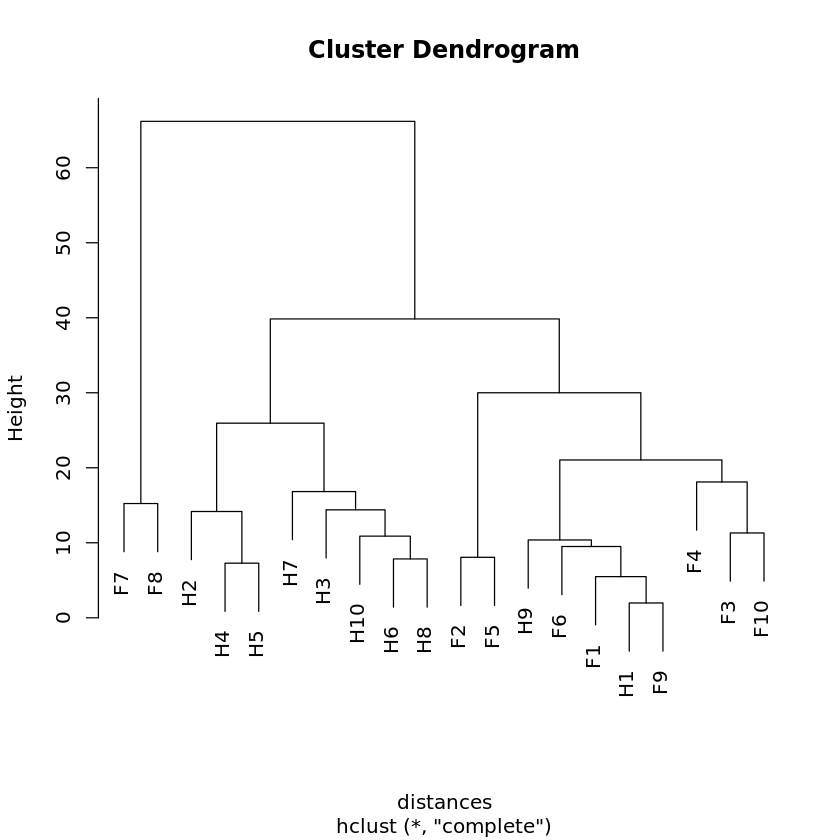

In [53]:
cah_body <- hclust(distances)
plot(cah_body)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Quel critère d'agglomération est utilisé par défaut par la fonction <code>hclust()</code> ?</li>
        <li>Mettre en oeuvre une classification ascendante hiérarchique en utilisant le critère de Ward comme critère d'agglomération.</li>
        <li>Représenter le dendrogramme associé aux résultats de cette classification.</li>
        <li>En utilisant <code>cah_body&dollar;height</code>, proposer un nombre de groupes raisonnable pour répartir les individus ?</li>
        <li>Utiliser la fonction <code>cutree()</code> avec le nombre de groupes souhaités pour associer chaque individu à un groupe. Les groupes peuvent être visualisés sur le dendrogramme en utilisant la fonction <code>rect.hclust()</code> et l'option <code>border=</code> pour les couleurs.<br>
            <center><img src="img/cah_body.png"></center></li>
        <li>Calculer une ACP des données <code>body</code> et représenter les individus dans le plan principal en donnant une couleur identique aux individus d'un même groupe de votre classification.<br>
            <center><img src="img/cah_acp_body.png"></center></li>
    </ol>
</div>

In [54]:
# QUESTION 1.1.1
# help(hclust)
cat("method='complete\n")
cat("L'algorithme fait des groupes en minimisant la plus grande distance intra-cluster à chaque étape")

method='complete
L'algorithme fait des groupes en minimisant la plus grande distance intra-cluster à chaque étape

In [55]:
# QUESTION 1.1.2
cah_body_ward <- hclust(distances, method='ward.D2')

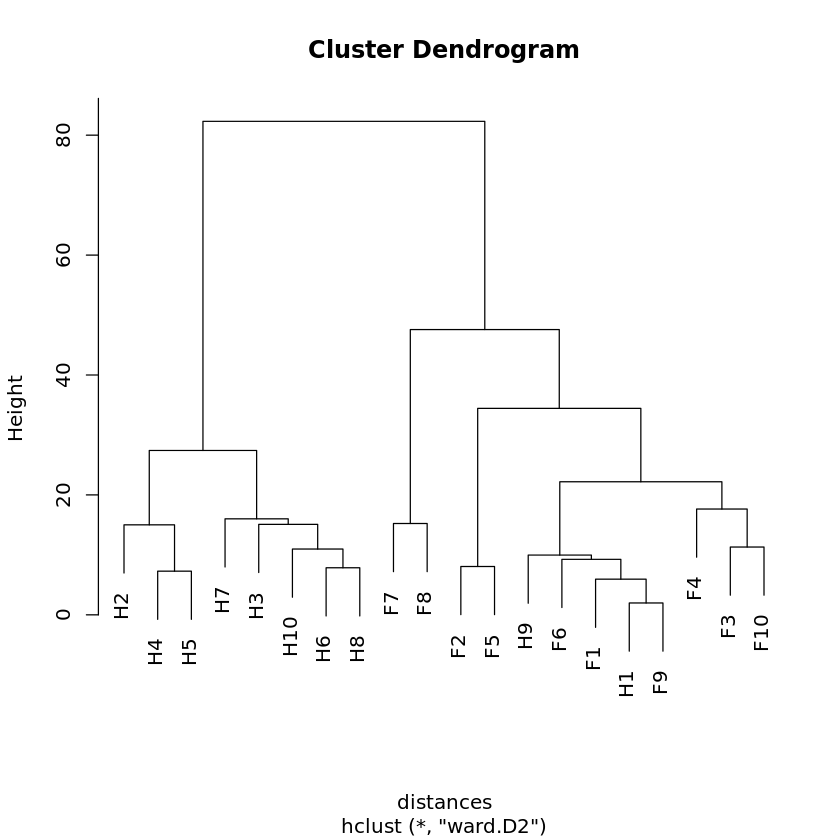

In [56]:
# QUESTION 1.1.3
plot(cah_body_ward)

[1] "On pourrait choisir de faire 3 groupes."


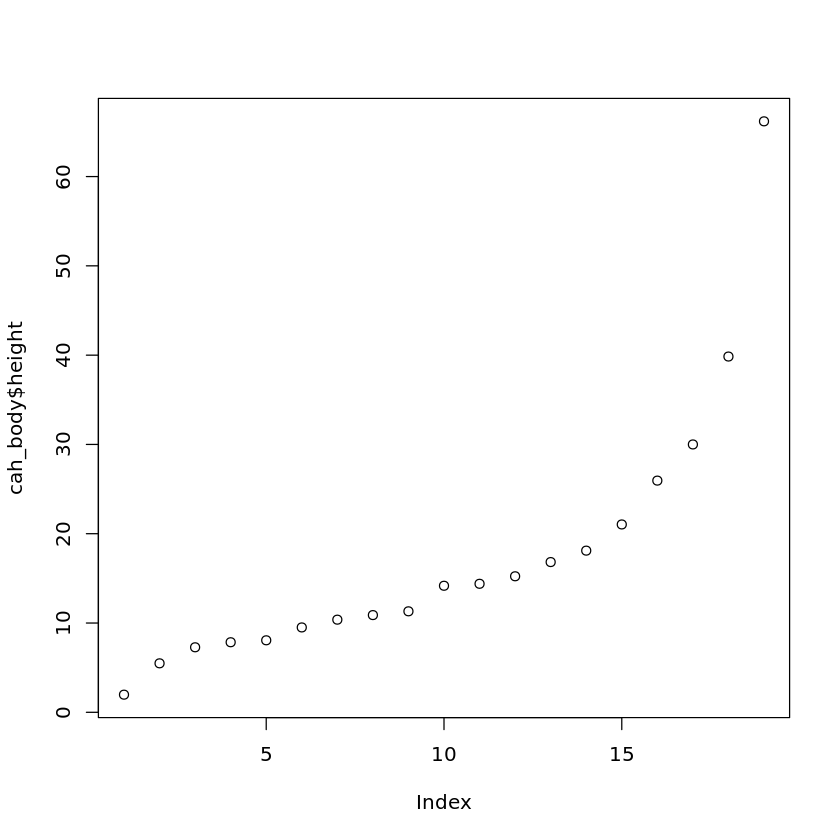

In [57]:
# QUESTION 1.1.4
plot(cah_body$height)
print("On pourrait choisir de faire 3 groupes.")

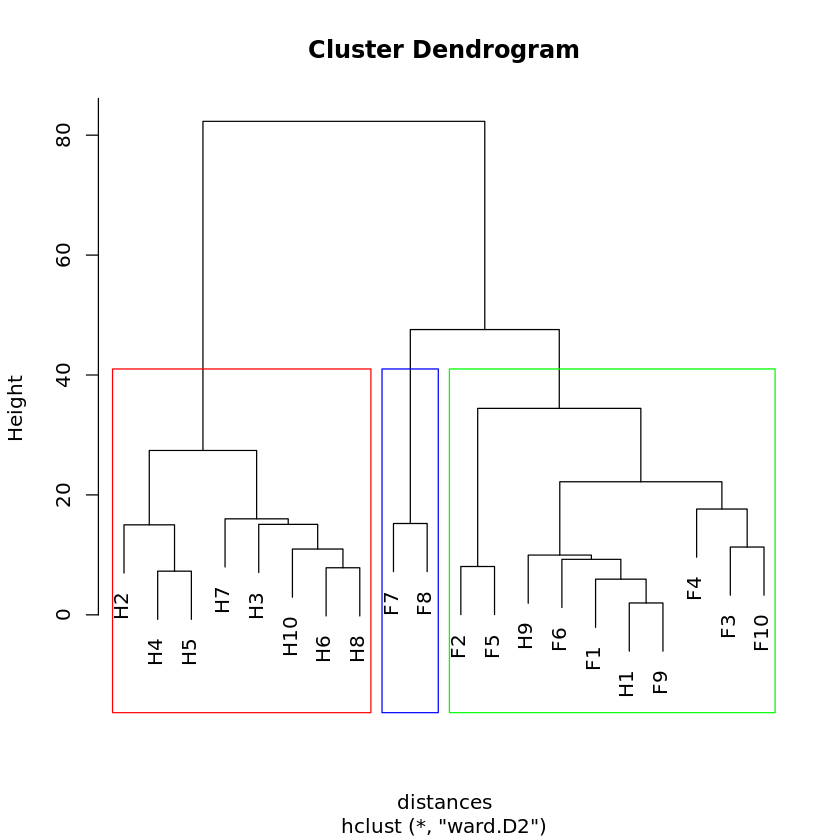

In [ ]:
# QUESTION 1.1.5
plot(cah_body_ward)
rect.hclust(cah_body_ward, k = 3, border = c("red", "blue", "green"))
# head(cutree(cah_body_ward, k = 3))

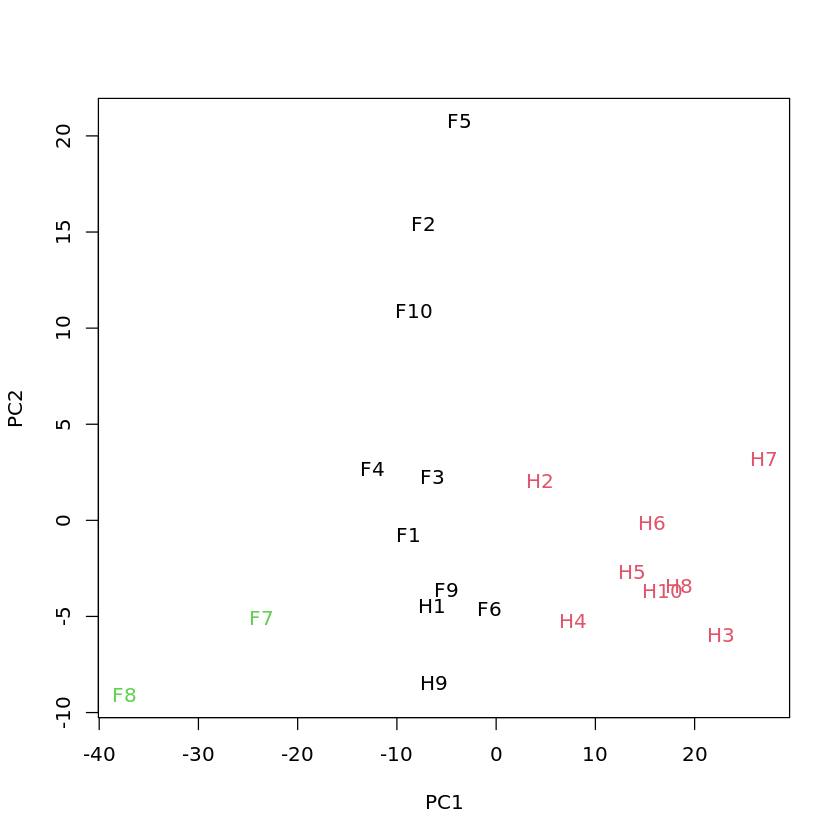

In [ ]:
# QUESTION 1.1.6
acp_body <- prcomp(data_body)
plot(acp_body$x, col='white')
text(acp_body$x, labels=rownames(acp_body$x), col=cutree(cah_body_ward, k = 3))

### 1.2 K-means

Pour réaliser un algorithme K-means, il est possible d'utiliser la fonction `kmeans()` avec l'option `centers=` pour définir un nombre entier de groupes.

In [68]:
# Exemple de K-means à 4 groupes
kmeans_body_1 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le premier K-means :\n")
print(kmeans_body_1$cluster)

# Un autre exemple de K-means à 4 groupes
kmeans_body_2 <- kmeans(data_body, centers=4)
cat("Groupes des individus pour le second K-means :\n")
print(kmeans_body_2$cluster)

Groupes des individus pour le premier K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   3   3   3   3   3   3   1   3   1   4   1   1   4   1   2   2   1   4 


Groupes des individus pour le second K-means :
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  3   3   1   1   1   1   1   1   3   1   3   4   3   3   4   3   2   2   3   4 


<div class="alert alert-block alert-success">
    Expliquer pourquoi les résultats obtenus sont différents.
</div>

Les résultats obtenus sont différents car l'initialisation des centroïds est différente.

Il est possible de construire la table de contingence qui croise les effectifs des 4 groupes obtenus dans les 2 cas avec la fonction `table()`.

In [73]:
table(kmeans_body_1$cluster, kmeans_body_2$cluster, dnn=c("kmeans1", "kmeans2"))

       kmeans2
kmeans1 1 2 3 4
      1 0 0 8 0
      2 0 2 0 0
      3 7 0 0 0
      4 0 0 0 3

<div class="alert alert-block alert-success">
    Croiser également l'un des résultats obtenus avec les groupes issus de la classification ascendante hiérarchique.
</div>

In [75]:
table(kmeans_body_1$cluster, cutree(cah_body_ward, k = 3), dnn=c("kmeans1", "cah"))

       cah
kmeans1 1 2 3
      1 7 1 0
      2 0 0 2
      3 0 7 0
      4 3 0 0

Afin de pallier l'aspect aléatoire de l'algorithme K-means et de stabiliser le résultat d'une classification ascendante hiérarchique, nous pouvons imposer les centres initiaux du K-means comme étant ceux donnés par les groupes de la CAH.

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Calculer les barycentres des classes issues de la classification hiérarchique ascendante et stocker ces résultats en ligne dans une matrice à 5 colonnes.</li>
        <li>Passer cette matrice à l'option <code>centers=</code> de la fonction <code>kmeans()</code>. Est-ce que le résultat est encore aléatoire ?</li>
        <li>Comparer les résultats de cette classification avec ceux de la classification ascendante hiérarchique sous forme d'une table puis sous forme graphique dans le plan principal.</li>
    </ol>
</div>

In [119]:
# QUESTION 1.2.1
barycentres_cah <- aggregate(data_body, by = list(Groupe = cutree(cah_body_ward, k = 3)), FUN = mean)[, 2:6]
barycentres_cah <- as.matrix(barycentres_cah)
barycentres_cah


T.epaule,T.poitrine,T.taille,Masse,Taille
104.91,92.660,74.68,68.2300,168.5600
115.10,98.975,79.85,78.1375,184.5625
95.60,82.700,60.70,52.0500,162.5500


In [120]:
# QUESTION 1.2.1
kmeans_body_init_cah <- kmeans(data_body, centers=barycentres_cah)
cat("Groupes des individus pour le K-means initisalisé avec les barycentres de la classification ascendante hiérarchique:\n")
print(kmeans_body_init_cah$cluster)

Groupes des individus pour le K-means initisalisé avec les barycentres de la classification ascendante hiérarchique:
 H1  H2  H3  H4  H5  H6  H7  H8  H9 H10  F1  F2  F3  F4  F5  F6  F7  F8  F9 F10 
  1   1   2   2   2   2   2   2   1   2   1   1   1   1   1   1   3   3   1   1 


In [123]:
# QUESTION 1.2.3
table(cutree(cah_body_ward, k = 3), kmeans_body_init_cah$cluster, dnn=c("kmeans1", "kmeans_cah"))

       kmeans_cah
kmeans1  1  2  3
      1 10  0  0
      2  1  7  0
      3  0  0  2

Tous les points ont étés affectés au même groupe sauf 1.

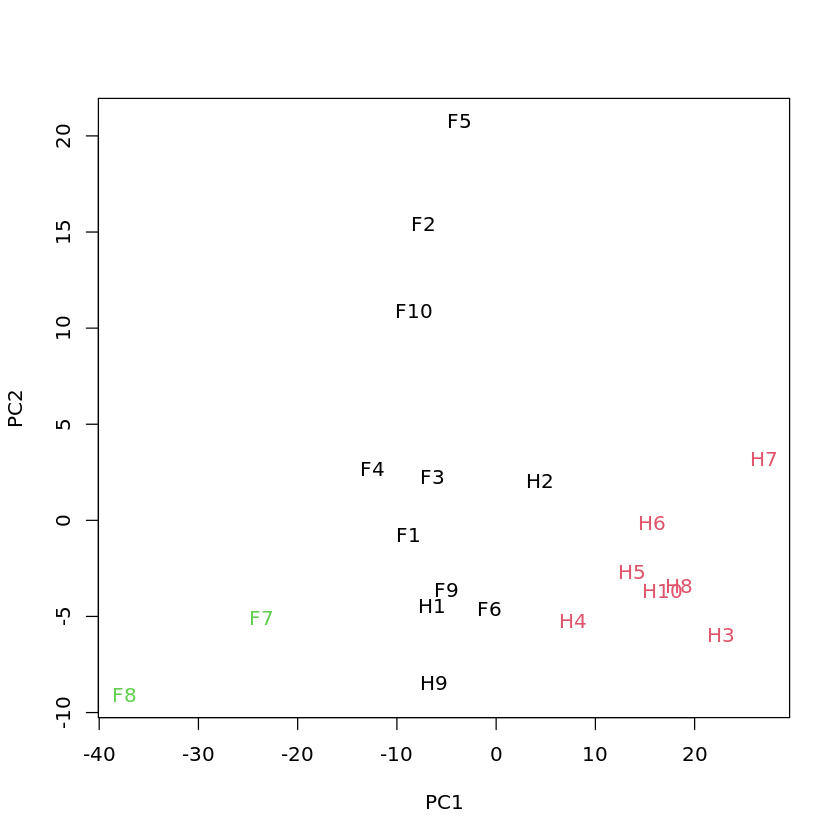

In [124]:
plot(acp_body$x, col='white')
text(acp_body$x, labels=rownames(acp_body$x), col=kmeans_body_init_cah$cluster)

C'est H2 qui a changé de groupe

## 2. Données `body` complètes

Les données sont consituées de 24 variables quantitatives (diamètres, circonférence, âge, taille, poids, ...) mesurées chez 507 individus hommes et femmes (le sexe étant précisé dans la variable `gender`).

In [125]:
data_body_full <- read.table("data/data-body.csv", sep=";", dec=",", header=TRUE)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Procéder à une classification ascendante hiérarchique (distance euclidienne et critère de Ward) sur les individus et représenter le dendrogramme associé.</li>
        <li>En combien de groupes classeriez-vous les individus ?</li>
        <li>Comparer les groupes de la classification à la variable <code>gender</code> à l'aide d'une table.</li>
        <li>Proposer plusieurs façons de caractériser chacun des groupes de la classification (individus moyens par groupe, ACP, ...).</li>
    </ol>
</div>

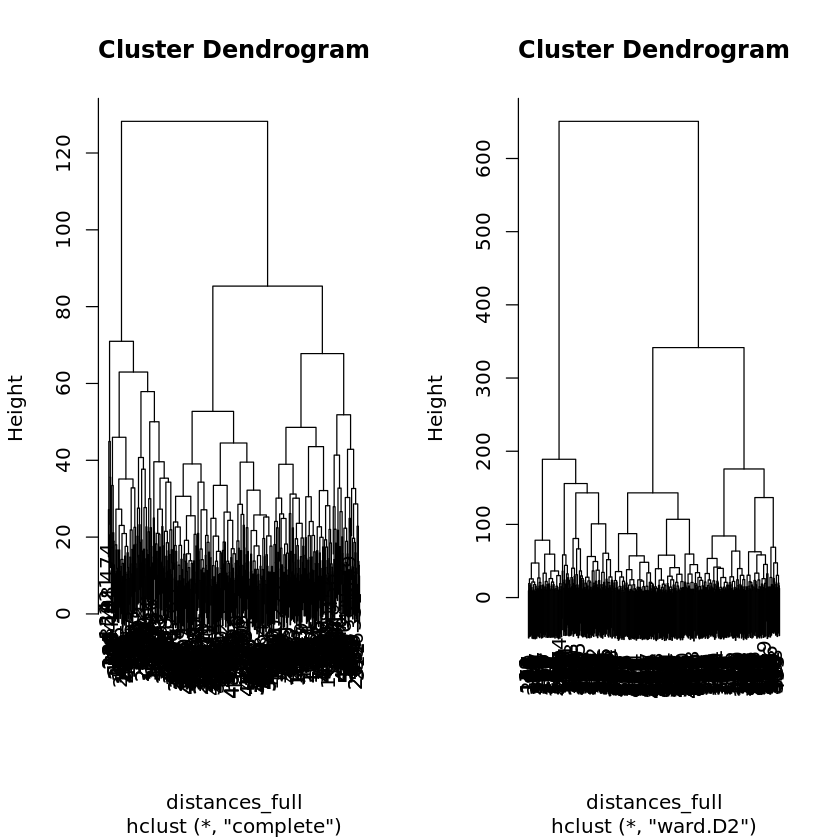

In [150]:
# QUESTION 2.1
distances_full <- dist(subset(data_body_full, select = -gender ))
cah_eucli <- hclust(distances_full)
cah_ward <- hclust(distances_full, method = 'ward.D2')
par(mfrow=c(1,2))
plot(cah_eucli)
plot(cah_ward)

In [134]:
# QUESTION 2.2
print("2 groupes")

[1] "2 groupes"


In [135]:
# QUESTION 2.3
table(data_body_full$gender, cutree(cah_ward, k = 2), dnn=c("gender", "cah_ward"))

      cah_ward
gender   1   2
     F 236  24
     M  99 148

Groupe,biacromial,pelvic.breadth,bitrochanteric,chest.depth,chest.diam,elbow.diam,wrist.diam,knee.diam,ankle.diam,⋯,thigh.girth,bicep.girth,forearm.girth,knee.girth,calf.girth,ankle.girth,wrist.girth,age,weight,height
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,37.57821,27.23701,31.24388,17.98507,26.64239,12.78000,10.13970,18.24060,13.36299,⋯,55.56328,29.00179,24.51791,35.09373,34.91493,21.32299,15.43701,28.36388,61.52179,167.4024
2,41.21337,28.98488,33.41512,21.64302,30.56686,14.56395,11.32733,19.92093,14.83779,⋯,59.37326,35.39186,28.71860,38.36337,38.34419,23.78256,17.38372,33.65058,84.00000,178.4308


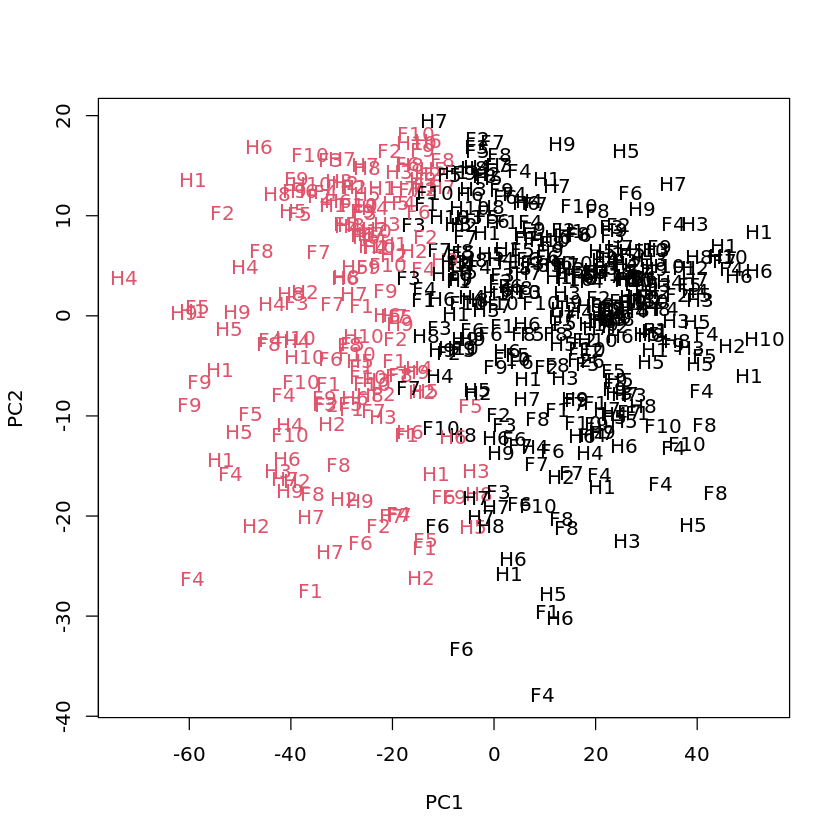

In [149]:
# QUESTION 2.4
# Individu moyen par groupe
barycentres_cah <- aggregate(subset(data_body_full, select = -gender ), by = list(Groupe = cutree(cah_ward, k = 2)), FUN = mean)
barycentres_cah

# ACP
acp_body_full <- prcomp(subset(data_body_full, select = -gender ))
plot(acp_body_full$x, col='white')
text(acp_body_full$x, labels=rownames(acp_body$x), col=cutree(cah_ward, k = 2))